HEART DISEASE PREDICTION

In [1]:
!pip install fancyimpute


In [2]:
import pandas as pd
import numpy as np

# Fix for deprecated np.float in newer NumPy versions
if not hasattr(np, 'float'):
    np.float = float

from fancyimpute import KNN
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from random import randrange,uniform
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz               
from sklearn.metrics import accuracy_score            
from sklearn.metrics import confusion_matrix           
from sklearn.ensemble import RandomForestClassifier    
import statsmodels.api as sn                           
from sklearn.neighbors import KNeighborsClassifier     
from sklearn.naive_bayes import GaussianNB             
from sklearn import model_selection                  
from sklearn.metrics import classification_report,roc_auc_score,roc_curve 
from sklearn.metrics import classification_report      
import pickle                                        
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant
np.random.seed(123) 
pd.options.mode.chained_assignment = None 

In [3]:
data=pd.read_csv(r"c:\Users\ankit\Downloads\heart.csv")

In [4]:
data.shape

(1025, 14)

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
210,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
182,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0
872,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
716,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


About The Dataset

In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [11]:

type(data)

pandas.core.frame.DataFrame

In [12]:

type(data)

pandas.core.frame.DataFrame

Exploratory Data Analysis (EDA)

target
1    526
0    499
Name: count, dtype: int64


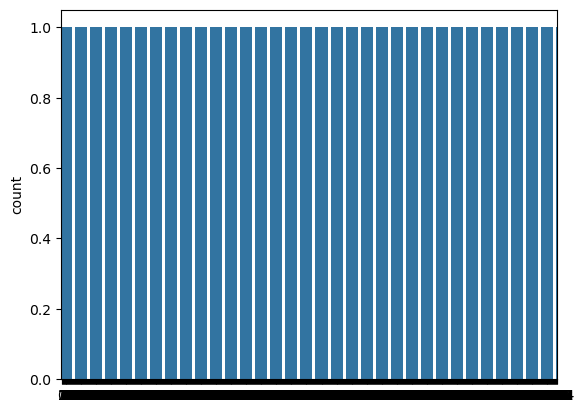

In [13]:
y = data["target"]

sns.countplot(y)


target_temp = data.target.value_counts()

print(target_temp)

In [15]:
import seaborn as sns

<Axes: xlabel='sex', ylabel='target'>

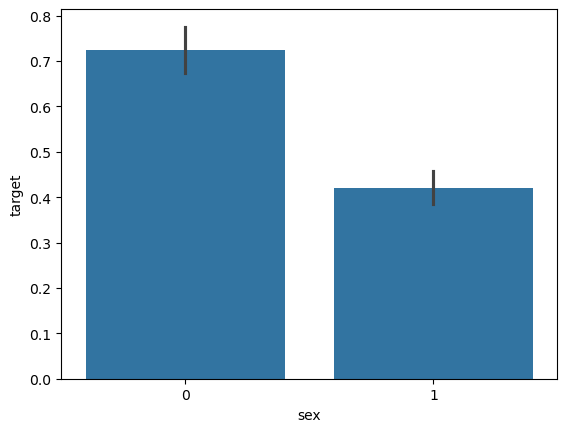

In [19]:
sns.barplot(x=data["sex"], y=data["target"])


We notice, that females are more likely to have heart problems than males

Making the data more simple

In [20]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [21]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

C:\Users\ankit\AppData\Local\Temp\ipykernel_23172\2353556852.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'female' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['sex'][data['sex'] == 0] = 'female'


In [22]:
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 4] = 'asymptomatic'

C:\Users\ankit\AppData\Local\Temp\ipykernel_23172\3392774098.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'typical angina' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'


In [23]:
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'
     

C:\Users\ankit\AppData\Local\Temp\ipykernel_23172\40645381.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'lower than 120mg/ml' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'


In [24]:
data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

C:\Users\ankit\AppData\Local\Temp\ipykernel_23172\2934713612.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'normal' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'


In [25]:
data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

C:\Users\ankit\AppData\Local\Temp\ipykernel_23172\3537573327.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'no' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'


In [26]:
data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'

C:\Users\ankit\AppData\Local\Temp\ipykernel_23172\2050891650.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'upsloping' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['st_slope'][data['st_slope'] == 1] = 'upsloping'


In [27]:
data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'
     

C:\Users\ankit\AppData\Local\Temp\ipykernel_23172\606388525.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'normal' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['thalassemia'][data['thalassemia'] == 1] = 'normal'


In [28]:
data['target'][data['target'] == 0] = 'no'
data['target'][data['target'] == 1] = 'yes'

C:\Users\ankit\AppData\Local\Temp\ipykernel_23172\3279807936.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'no' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['target'][data['target'] == 0] = 'no'


Percentage of patients with or without heart problems

In [29]:
cat_columns = []

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype('category')     # Convert to category dtype
        data[col] = data[col].cat.codes              # Replace with category codes
        data[col] = data[col].astype('object')       # Optional: convert back to object
        cat_columns.append(col)


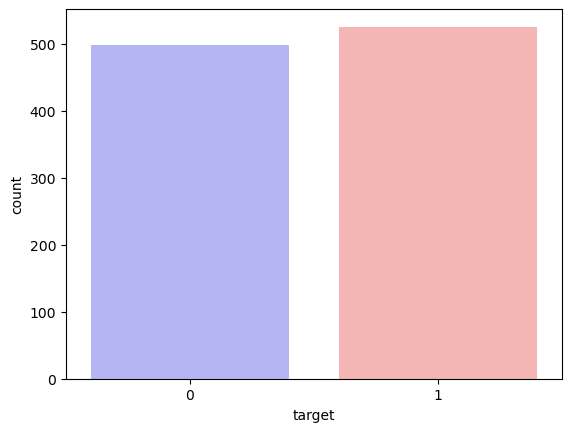

In [ ]:
sns.countplot(x='target',data=data,palette="bwr")
plt.show()

In [30]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:30.44%
Percentage of Male Patients:69.56%


In [31]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


In [32]:
data.groupby('target').mean()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.432866,134.106212,251.292585,0.835671,1.158317,139.130261,0.549098,1.600200,1.557114,1.158317,2.360721
1,52.408745,0.570342,1.374525,129.245247,240.979087,0.865019,0.819392,158.585551,0.134981,0.569962,1.247148,0.370722,1.376426


Heart disease frequency for ages

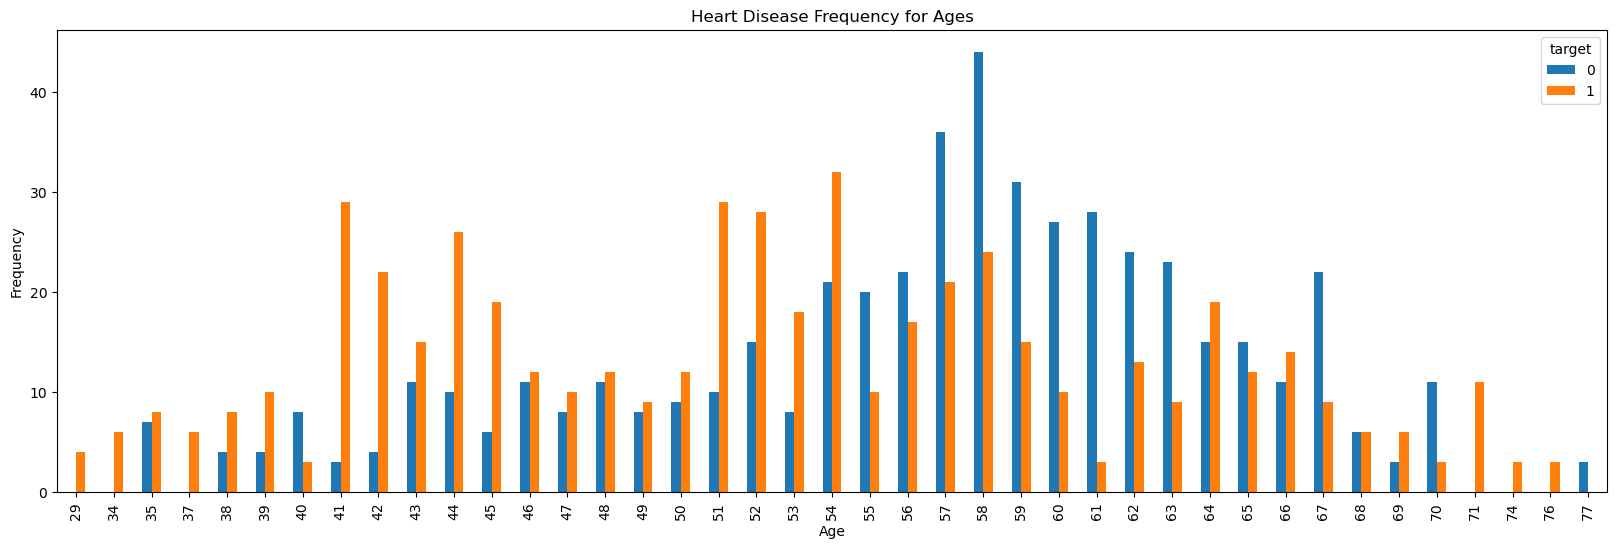

In [33]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

Heart Disease Frequency for male and female

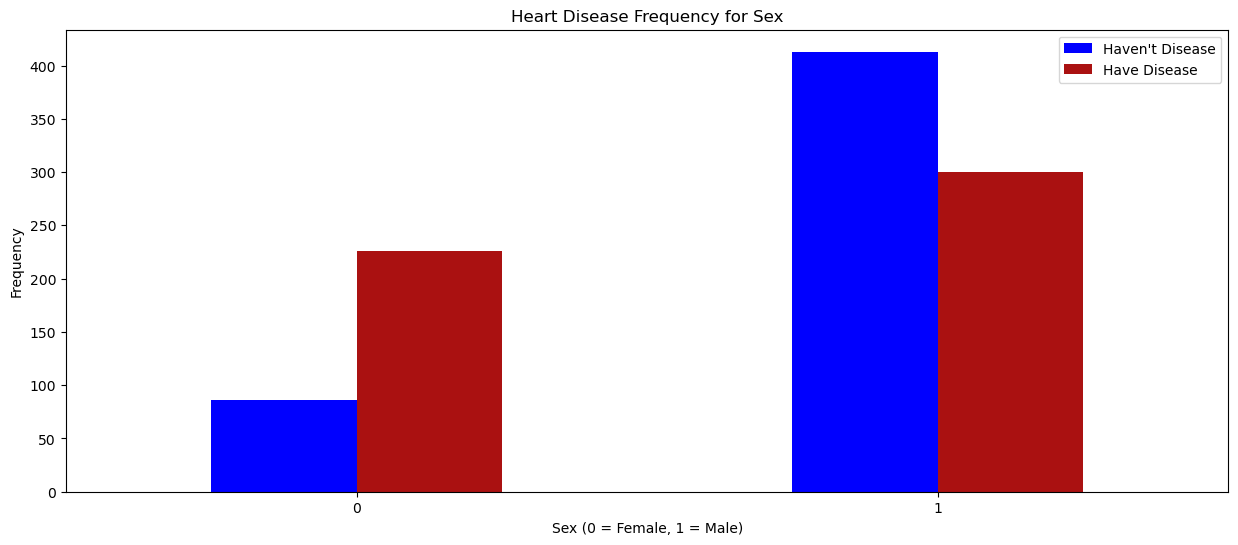

In [34]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Thalassemia vs cholesterol

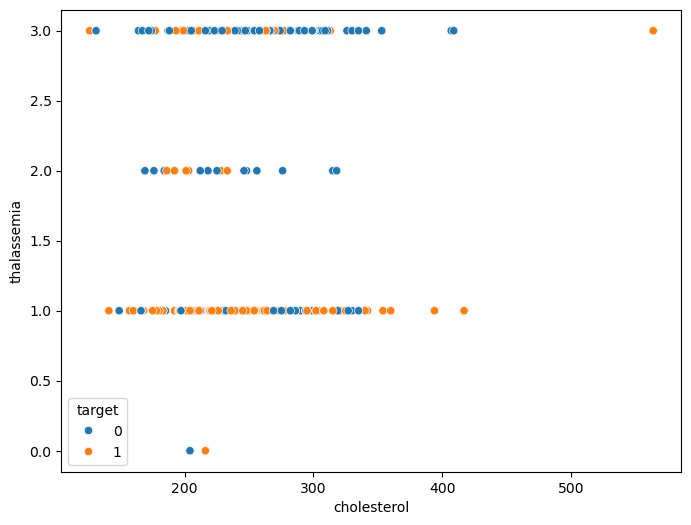

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

Thalassemia vs resting blood pressure

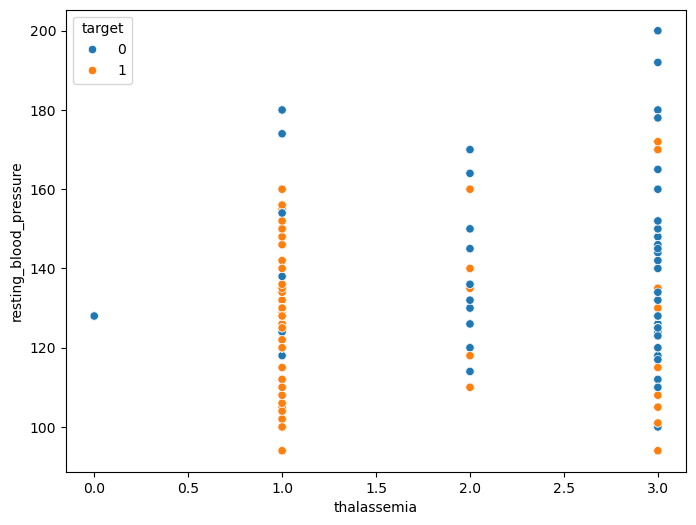

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

Age vs Maximum heart disease rate

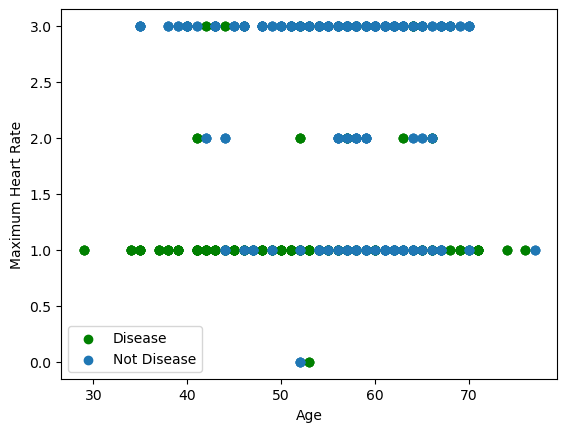

In [37]:
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Fasting Blood sugar Data

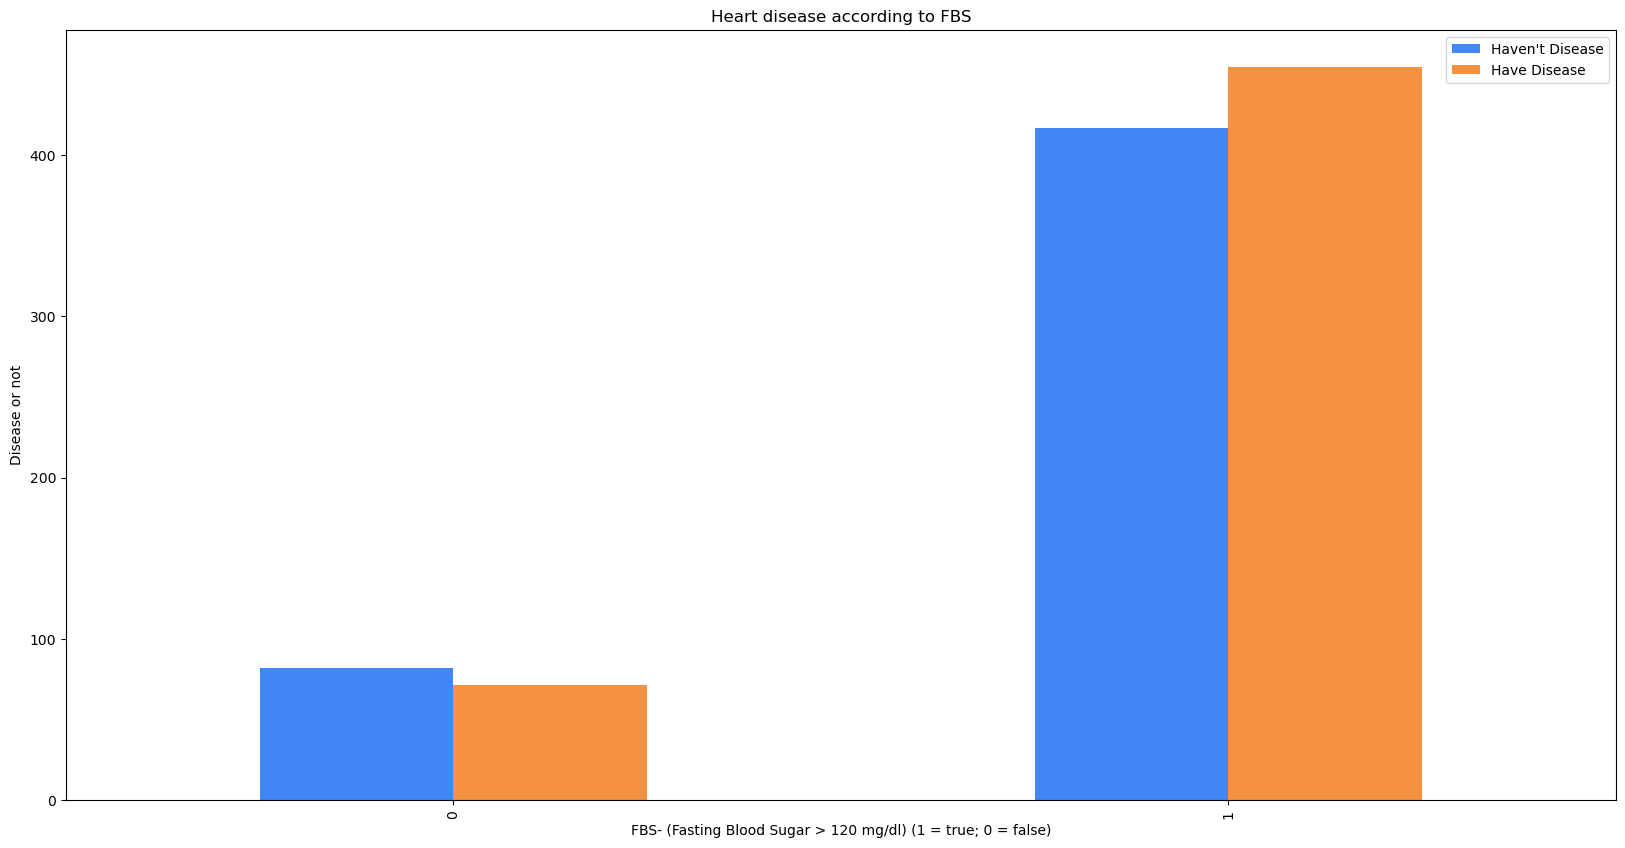

In [38]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

Missing Value Analysis

In [39]:
data.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

Feature Selection

In [40]:
names=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

In [41]:
import numpy as np

# Quick fix for deprecated np.bool in libraries like seaborn/pandas
if not hasattr(np, 'bool'):
    np.bool = bool


C:\Users\ankit\AppData\Local\Temp\ipykernel_23172\183501360.py:4: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, 'bool'):


In [ ]:
!pip install --upgrade seaborn


In [42]:
import seaborn as sns
import matplotlib
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", matplotlib.__version__)


Seaborn version: 0.13.2
Matplotlib version: 3.8.0


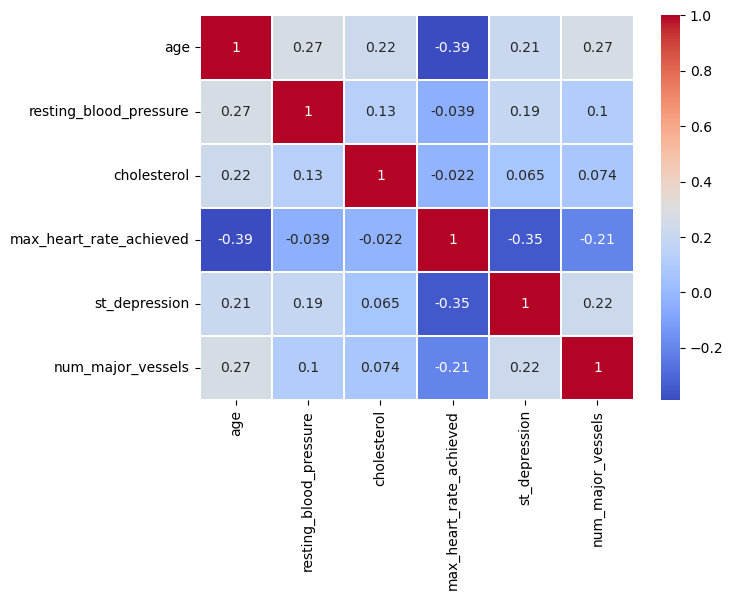

In [43]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,names]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [44]:
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,52,125,212,168,1.0,2
1,53,140,203,155,3.1,0
2,70,145,174,125,2.6,0
3,61,148,203,161,0.0,1
4,62,138,294,106,1.9,3
...,...,...,...,...,...,...
1020,59,140,221,164,0.0,0
1021,60,125,258,141,2.8,1
1022,47,110,275,118,1.0,1
1023,50,110,254,159,0.0,0


In [45]:
predictors = data.drop("target",axis=1)
target = data["target"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

Train Test Split

In [46]:
X_train.shape

(820, 13)

In [47]:
X_test.shape

(205, 13)

In [48]:
Y_train.shape

(820,)

In [49]:
Y_test.shape

(205,)

Model Fitting

Naive Bayes

In [50]:
nb = GaussianNB()

Y_train=Y_train.astype('int')

nb.fit(X_train,Y_train)


Y_pred_nb = nb.predict(X_test)

In [51]:
Y_pred_nb.shape

(205,)

In [52]:
# build confusion metrics
CM=pd.crosstab(Y_test,Y_pred_nb)
CM

col_0,0,1
target,,
0,85,13
1,12,95


In [53]:
#let us save TP, TN, FP, FN
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [54]:
score_nb=((TP+TN)*100)/(TP+TN+FP+FN)
score_nb

87.8048780487805

In [55]:
# check false negative rate of the model
fnr=FN*100/(FN+TP)
fnr

11.214953271028037

Decision Tree

In [62]:
# replace target variable  with yes or no
data['target'] = data['target'].replace(0, 'No')
data['target'] = data['target'].replace(1, 'Yes')

In [64]:
# to handle data imbalance issue we are dividing our dataset on basis of stratified sampling
# divide data into train and test
X=data.values[:,0:13]
Y=data.values[:,13]
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2)

In [65]:
# Decision tree - we will build the model on train data and test it on test data
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)
# predict new test cases
C50_Predictions = C50_model.predict(X_test) # applying decision tree model on test data set

In [66]:
data1 = data.iloc[:, :-1]


In [67]:
#Create dot file to visualise tree  #http://webgraphviz.com/
dotfile = open("pt.dot", 'w')
df = tree.export_graphviz(C50_model, out_file=dotfile,feature_names=data1.columns)

In [68]:
# Confusion matrix of decision tree
CM = pd.crosstab(Y_test, C50_Predictions)
CM

col_0,No,Yes
row_0,,
No,91,3
Yes,3,108


In [69]:
#let us save TP, TN, FP, FN
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [70]:
#check accuracy of model
score_dt=((TP+TN)*100)/(TP+TN+FP+FN)
score_dt

97.07317073170732

In [71]:
# check false negative rate of the model
fnr=FN*100/(FN+TP)
fnr

2.7027027027027026

KNN(K Nearest Neighbors)
for neighbors = 7


In [72]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [73]:
Y_pred_knn.shape

(205,)

In [75]:
score_knn_7 = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: " + str(score_knn_7) + " %")


The accuracy score achieved using KNN is: 70.73 %


In [76]:
knn_model=KNeighborsClassifier(n_neighbors=4).fit(X_train,Y_train)
knn_predictions=knn_model.predict(X_test)

In [78]:
# build confusion metrics
CM=pd.crosstab(Y_test,knn_predictions)
CM

col_0,No,Yes
row_0,,
No,87,7
Yes,38,73


In [81]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []
from sklearn import metrics
# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, Y_pred_knn))

print(scores)

[0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317]


In [82]:
#let us save TP, TN, FP, FN
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [83]:
#check accuracy of model
score_knn_4=((TP+TN)*100)/(TP+TN+FP+FN)
score_knn_4

78.04878048780488

In [84]:
# check false negative rate of the model
fnr=FN*100/(FN+TP)
fnr

34.234234234234236

Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [87]:
Y_pred_lr.shape

(205,)

In [88]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 82.44 %


In [90]:
scores = [score_lr,score_nb,score_knn_7,score_dt]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 82.44 %
The accuracy score achieved using Naive Bayes is: 87.8048780487805 %
The accuracy score achieved using K-Nearest Neighbors is: 70.73 %
The accuracy score achieved using Decision Tree is: 97.07317073170732 %


C:\Users\ankit\AppData\Local\Temp\ipykernel_23172\3551770615.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Algorithm", y="Accuracy", data=results_df, palette="crest")


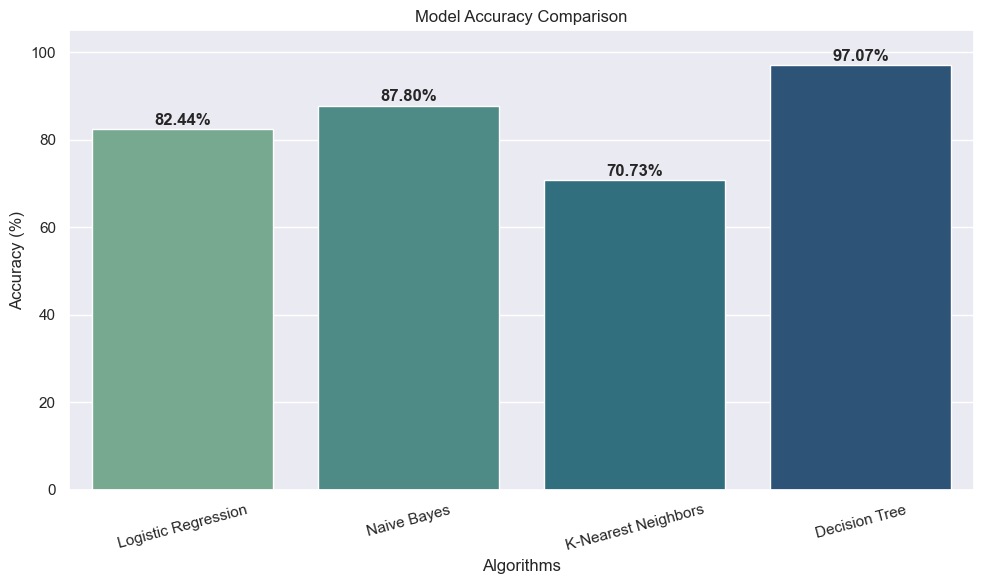

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your actual results
algorithms = [
    "Logistic Regression",
    "Naive Bayes",
    "K-Nearest Neighbors",
    "Decision Tree"
]

scores = [
    82.44,
    87.80,
    70.73,
    97.07
]

# Create a DataFrame
results_df = pd.DataFrame({
    "Algorithm": algorithms,
    "Accuracy": scores
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Algorithm", y="Accuracy", data=results_df, palette="crest")

# Add accuracy labels on top of each bar
for index, row in results_df.iterrows():
    plt.text(index, row.Accuracy + 1, f"{row.Accuracy:.2f}%", ha='center', fontweight='bold')

# Customize plot
plt.title("Model Accuracy Comparison")
plt.ylim(0, 105)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
